In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [64]:
#print (observation.dtypes)
#print (observation.isnull().sum())
#print (observation.park_name.unique())
#print (observation.scientific_name.unique)
print (observation.duplicated().sum() , ', number of duplicated values in observation data')
observation_2 = observation.drop_duplicates()
print (observation_2.shape , ' dimensions of the dataframe')
print (observation_2.scientific_name.nunique() , ' unique values of the dataframe')

15 , number of duplicated values in observation data
(23281, 3)  dimensions of the dataframe
5541  unique values of the dataframe


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
                                     observations
park_name                                        
Yellowstone National Park                 1442314
Yosemite National Park                     862836
Bryce National Park                        575901
Great Smoky Mountains National Park        431378


Text(0.5, 1.0, 'Number of Observations in each park')

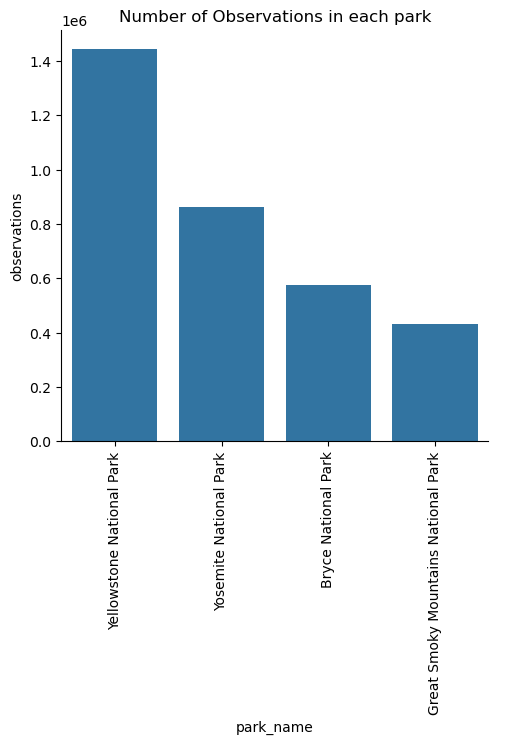

In [70]:
print (observation_2.head())
obervations_parks = observation_2.groupby('park_name').sum(numeric_only=True).sort_values(by='observations', ascending=False)
print (obervations_parks)
sns.catplot(data=obervations_parks , kind = 'bar' , x = 'park_name' , y ='observations')
plt.xticks(rotation=90)
plt.title('Number of Observations in each park')

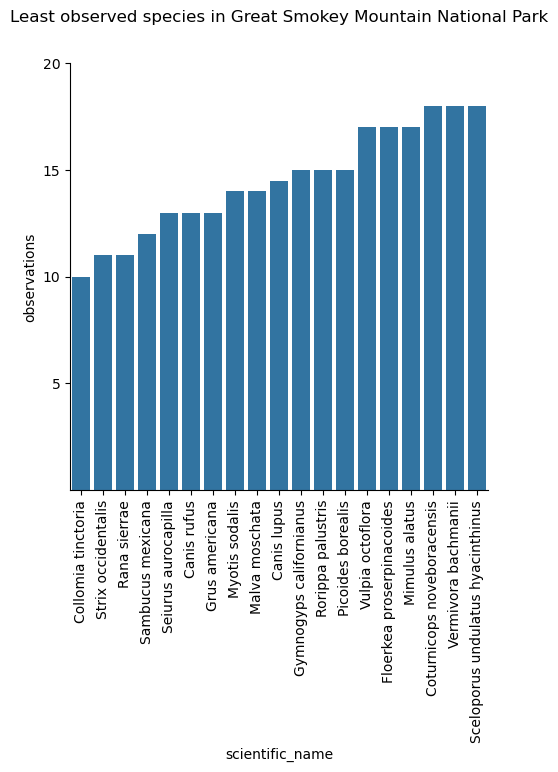

<Figure size 640x480 with 0 Axes>

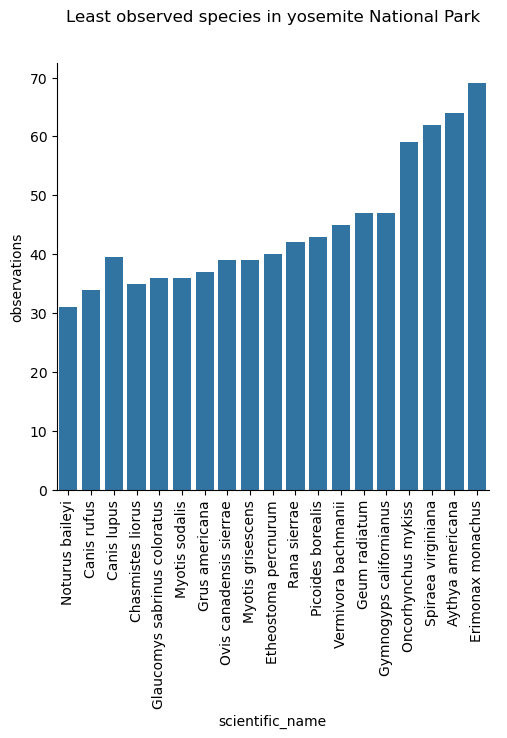

<Figure size 640x480 with 0 Axes>

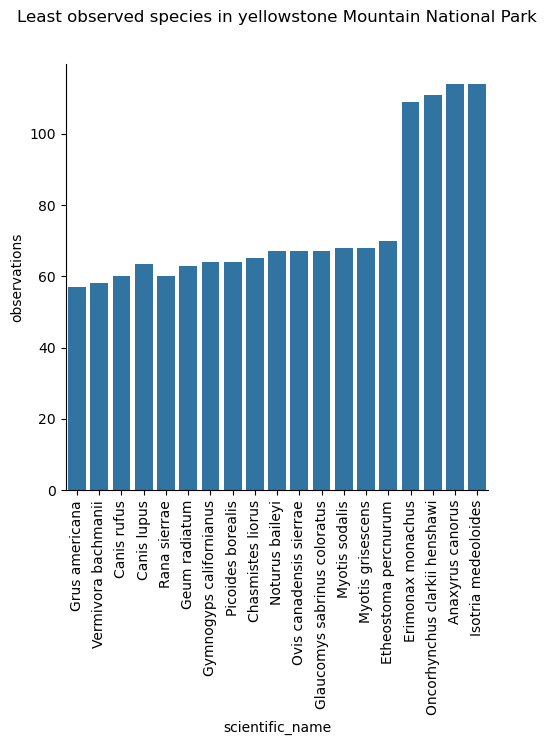

<Figure size 640x480 with 0 Axes>

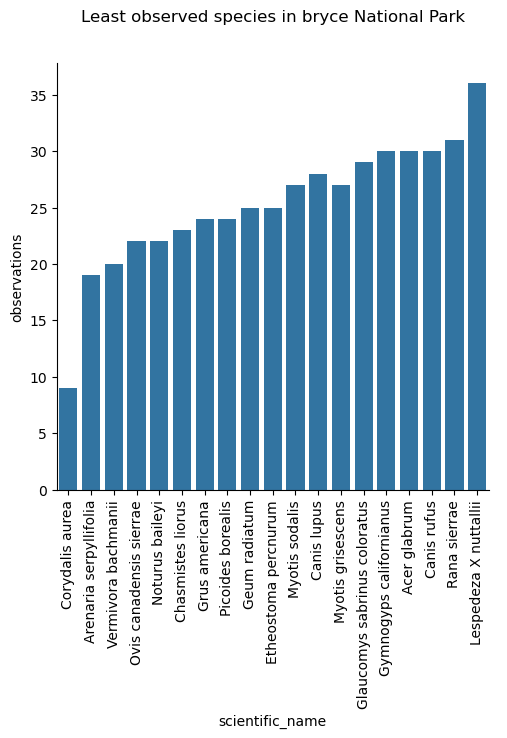

<Figure size 640x480 with 0 Axes>

In [159]:
smoky_mountains = observation_2.loc[observation_2.park_name == 'Great Smoky Mountains National Park']
yosemite = observation_2.loc[observation_2.park_name == 'Yosemite National Park']
yellowstone = observation_2.loc[observation_2.park_name == 'Yellowstone National Park']
bryce = observation_2.loc[observation_2.park_name == 'Bryce National Park']

smoky_mountains_endangered = smoky_mountains.sort_values(by ='observations' , ascending=True).head(20)
sns.catplot(data=smoky_mountains_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
plt.xticks(rotation=90)
plt.yticks([5,10,15,20])
plt.title('Least observed species in Great Smokey Mountain National Park' , pad=30)
plt.show()
plt.clf()

yosemite_endangered = yosemite.sort_values(by ='observations' , ascending=True).head(20)
sns.catplot(data=yosemite_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
plt.xticks(rotation=90)
#plt.yticks([5,10,15,20,25,30,35,40,45,50])
plt.title('Least observed species in yosemite National Park' , pad=30)
plt.show()
plt.clf()

yellowstone_endangered = yellowstone.sort_values(by ='observations' , ascending=True).head(20)
sns.catplot(data=yellowstone_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
plt.xticks(rotation=90)
#plt.yticks([5,10,20,30,40, 50,60,70 , 80])
plt.title('Least observed species in yellowstone Mountain National Park' , pad=30)
plt.show()
plt.clf()

bryce_endangered = bryce.sort_values(by ='observations' , ascending=True).head(20)
sns.catplot(data=bryce_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
plt.xticks(rotation=90)
#plt.yticks([5,10,15,20,25,30,35,40])
plt.title('Least observed species in bryce National Park' , pad=30)
plt.show()
plt.clf()

In [167]:
import plotly.express as px

smoky_mountains_endangered = smoky_mountains.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations',title="Most observed species in Great Smokey Mountain National Park")
fig.show()
# sns.catplot(data=smoky_mountains_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
# plt.xticks(rotation=90)
# #plt.yticks([5,10,15,20])
# plt.title('Most observed species in Great Smokey Mountain National Park' , pad=30)
# plt.show()
# plt.clf()

yosemite_endangered = yosemite.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations', title="Most observed species in yosemite National Park")
fig.show()
# sns.catplot(data=yosemite_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
# plt.xticks(rotation=90)
# #plt.yticks([5,10,15,20,25,30,35,40,45,50])
# plt.title('Most observed species in yosemite National Park' , pad=30)
# plt.show()
# plt.clf()

yellowstone_endangered = yellowstone.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations', title = 'Most observed species in yellowstone National Park')
fig.show()
# sns.catplot(data=yellowstone_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
# plt.xticks(rotation=90)
# #plt.yticks([5,10,20,30,40, 50,60,70 , 80])
# plt.title('Most observed species in yellowstone Mountain National Park' , pad=30)
# plt.show()
# plt.clf()

bryce_endangered = bryce.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations', title = 'Most observed species in bryce National Park')
fig.show()
# sns.catplot(data=bryce_endangered , kind = 'bar' , x = 'scientific_name' , y ='observations',errorbar=None)
# plt.xticks(rotation=90)
# #plt.yticks([5,10,15,20,25,30,35,40])
# plt.title('Most observed species in bryce National Park' , pad=30)
# plt.show()
# plt.clf()